In [1]:
!pip install tensorflow -qqq
!pip install keras -qqq
!pip install yfinance -qqq


#Attention Mechanism: Enhancing LSTM

The attention mechanism, initially popularized in the field of natural language processing, has found its way into various other domains, including finance. It operates on a simple yet profound concept: not all parts of the input sequence are equally important. By allowing the model to focus on specific parts of the input sequence while ignoring others, the attention mechanism enhances the model’s context understanding capabilities.

Incorporating attention into LSTM networks results in a more focused and context-aware model. When predicting stock prices, certain historical data points may be more relevant than others. The attention mechanism empowers the LSTM to weigh these points more heavily, leading to more accurate and nuanced predictions.

#The Relevance in Financial Pattern Prediction

The amalgamation of LSTM with attention mechanisms creates a robust model for financial pattern prediction. The financial market is a complex adaptive system, influenced by a multitude of factors and exhibiting non-linear characteristics. Traditional models often fall short in capturing this complexity. However, LSTM networks, especially when combined with an attention mechanism, are adept at unraveling these patterns, offering a deeper understanding and more accurate forecasts of future stock movements.

As we proceed to build and implement an LSTM with an attention mechanism to predict the next four candles of AAPL’s stock, we delve into a sophisticated realm of financial analysis, one that holds the promise of revolutionizing how we interpret and respond to the ever-changing dynamics of the stock market.

In [2]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.15.0


#Data Acquisition from yfinance

In [4]:
# Fetch AAPL data
bbca_data = yf.download('BBCA.JK', start='2020-01-01', end='2024-04-05')

# Display the first few rows of the dataframe
bbca_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.104492,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024414,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944824,53692500


#Data Cleaning

In [5]:
# Checking for missing values
bbca_data.isnull().sum()

# Filling missing values, if any
bbca_data.fillna(method='ffill', inplace=True)

#Normalization
Normalization is a technique used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

Applying Min-Max Scaling: This scales the dataset so that all the input features lie between 0 and 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
bbca_data_scaled = scaler.fit_transform(bbca_data['Close'].values.reshape(-1,1))


#Creating Sequences
LSTM models require input to be in a sequence format. We transform the data into sequences for the model to learn from.

Defining Sequence Length: Choose a sequence length (like 60 days). This means, for every sample, the model will look at the last 60 days of data to make a prediction.

In [8]:
X = []
y = []

for i in range(60, len(bbca_data_scaled)):
    X.append(bbca_data_scaled[i-60:i, 0])
    y.append(bbca_data_scaled[i, 0])


#Train-Test Split
Split the data into training and testing sets to evaluate the model’s performance properly.

Defining Split Ratio: Typically, 80% of data is used for training and 20% for testing.

In [9]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#Reshaping Data for LSTM
Finally, we need to reshape our data into a 3D format [samples, time steps, features] required by LSTM layers.

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Model initialization
# model = Sequential()

# # Adding the first LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Adding additional LSTM layers
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))


#Creating LSTM Layers
Our LSTM model will consist of several layers, including LSTM layers for processing the time-series data. The basic structure is as follows:

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 [==============================] - 9s 61ms/step - loss: 0.0379 - val_loss: 0.0050
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 8/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 9/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0035

#Integrating the Attention Mechanism
The attention mechanism can be added to enhance the model’s ability to focus on relevant time steps:

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)



Epoch 1/100
25/25 [==============================] - 5s 48ms/step - loss: 0.0254 - val_loss: 0.0100
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 10/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0039

#Optimizing the Model
To enhance the model’s performance and reduce the risk of overfitting, we include Dropout and Batch Normalization.

In [14]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(bbca_data) * 0.8)
train_data, test_data = bbca_data[:train_size], bbca_data[train_size:]


#Model Summary
It’s beneficial to view the summary of the model to understand its structure and number of parameters.

In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)             

#Training the Model
Now that our LSTM model with attention is built, it’s time to train it using our prepared training set. This process involves feeding the training data to the model and letting it learn to make predictions.

Training Code
Use the following code to train your model with X_train and y_train:

In [18]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 [==============================] - 6s 45ms/step - loss: 0.7258 - val_loss: 0.4055
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.2687 - val_loss: 0.4301
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.1631 - val_loss: 0.4357
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.1254 - val_loss: 0.3999
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 0.1192 - val_loss: 0.3879
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0968 - val_loss: 0.3296
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0808 - val_loss: 0.3049
Epoch 8/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0667 - val_loss: 0.2935
Epoch 9/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0591 - val_loss: 0.2551
Epoch 10/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0496 - val_loss: 0.2390

#Overfitting and How to Avoid It
Overfitting occurs when a model learns patterns specific to the training data, which do not generalize to new data. Here are ways to avoid overfitting:

##Validation Set:
Using a validation set (as we did in the training code) helps in monitoring the model’s performance on unseen data.
##Early Stopping:
This technique stops training when the model’s performance on the validation set starts to degrade. Implementing early stopping in Keras is straightforward:

In [19]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0092
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 7.2040e-04
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 4/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 5/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0075
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 8/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 9/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 10/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0054 - val_loss: 0.

Here, patience=10 means training will stop if the validation loss does not improve for 10 consecutive epochs.

Regularization Techniques: Techniques like Dropout and Batch Normalization, which are already included in our model, also help in reducing overfitting.
Optional: These are more callbacks

In [20]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/100
25/25 [==============================] - 1s 46ms/step - loss: 0.0061 - val_loss: 3.8724e-04 - lr: 0.0010
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 0.0070

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 1s 25ms/step - loss: 0.0061 - val_loss: 0.0336 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0080 - val_loss: 0.0559 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0066 - val_loss: 0.0012 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0062 - val_loss: 0.0136 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0053 - val_loss: 0.0017 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0052 - lr: 1.0000e-04
Epoch 8/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0080 - lr: 1.0000e-04
Epoch 9/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0059 - val_loss: 0.0042 - lr: 1.0000e-04
Epoch 10/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0045 - val_loss: 0.

#Evaluating Model Performance
After training the model, the next step is to evaluate its performance using the test set. This will give us an understanding of how well our model can generalize to new, unseen data.

Evaluating with the Test Set
To evaluate the model, we first need to prepare our test data (X_test) in the same way we did for the training data. Then, we can use the model's evaluate function:

In [21]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)



7/7 [==============================] - 0s 6ms/step - loss: 0.0068
Test Loss:  0.006755087524652481


#Performance Metrics
In addition to the loss, other metrics can provide more insights into the model’s performance. For regression tasks like ours, common metrics include:

Mean Absolute Error (MAE): This measures the average magnitude of the errors in a set of predictions, without considering their direction.
Root Mean Square Error (RMSE): This is the square root of the average of squared differences between prediction and actual observation.
To calculate these metrics, we can make predictions using our model and compare them with the actual values:

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


7/7 [==============================] - 1s 5ms/step
Mean Absolute Error:  0.07944180669685669
Root Mean Square Error:  0.08218934043878573


#Predicting the Next 4 Candles
Having trained and evaluated our LSTM model with an attention mechanism, the final step is to utilize it for predicting the next 4 candles (days) of AAPL stock prices.

Making Predictions
To predict future stock prices, we need to provide the model with the most recent data points. Let’s assume we have the latest 60 days of data prepared in the same format as X_train: and we want to predict the price for the next day:

In [23]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the latest 60 days of AAPL stock data
data = yf.download('BBCA.JK', period='60d', interval='1d')

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

# Since we need the last 60 days to predict the next day, we reshape the data accordingly
X_latest = np.array([scaled_data[-60:].reshape(60)])

# Reshaping the data for the model (adding batch dimension)
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Making predictions for the next 4 candles
predicted_stock_price = model.predict(X_latest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 23ms/step
Predicted Stock Prices for the next 4 days:  [[9805.803]]


Let’s predict the price for the next 4 days:

In [24]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days of AAPL stock data
data = yf.download('BBCA.JK', period='60d', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step
Predicted Stock Prices for the next 4 days:  [9805.803, 9778.7295, 9762.877, 9746.787]


In [25]:
!pip install mplfinance -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


#Visualization of Predictions
Comparing the predicted values with actual stock prices visually can be very insightful. Below is the code to plot the predicted stock prices against the actual data:

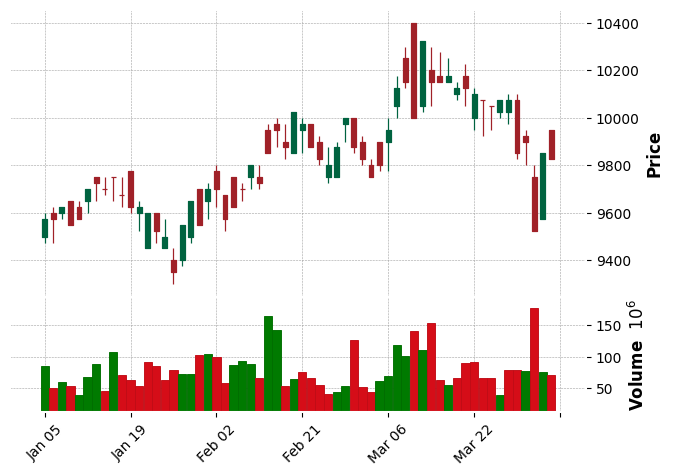

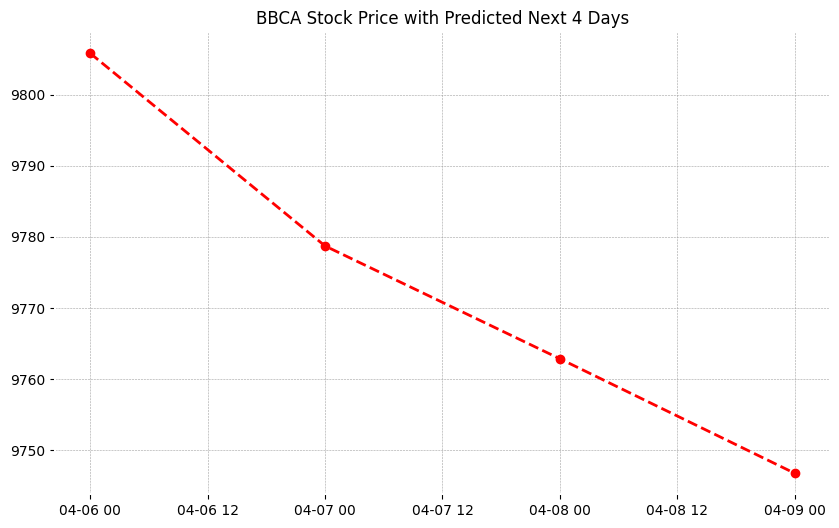

In [26]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("BBCA Stock Price with Predicted Next 4 Days")
plt.show()



[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


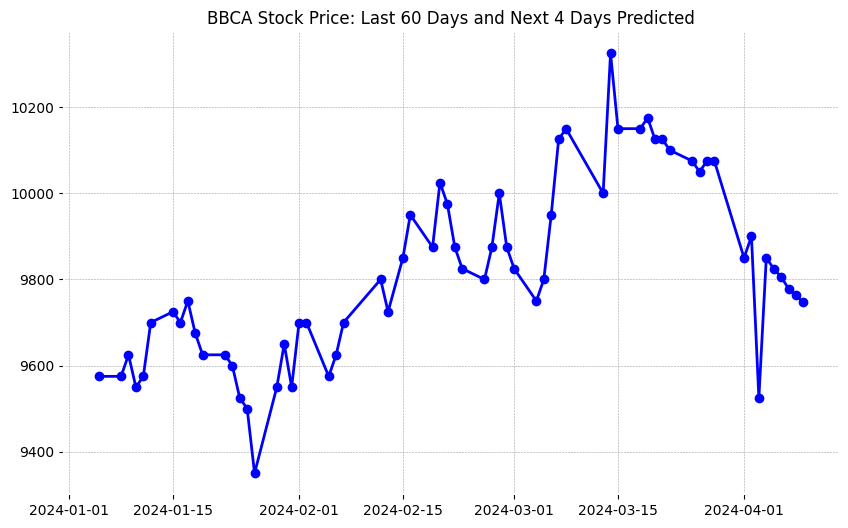

In [27]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('BBCA.JK', period='64d', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(combined_data, linestyle='-', marker='o', color='blue')
plt.title("BBCA Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.show()


#Final Visual for Predictions:

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


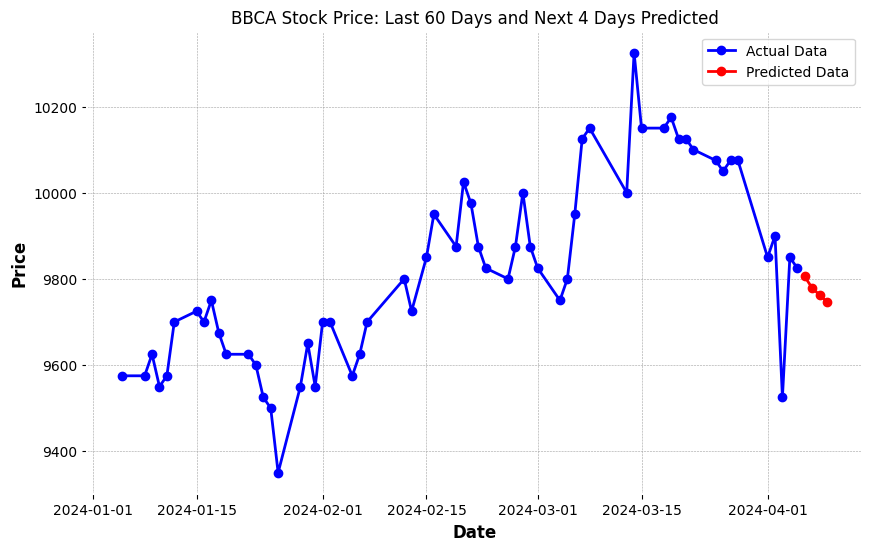

In [28]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('BBCA.JK', period='64d', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("BBCA Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


def predict_stock_price(input_date):
    # Check if the input date is a valid date format
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        print("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        return

    # Fetch data from yfinance
    end_date = input_date
    start_date = input_date - timedelta(days=90)  # Fetch more days to ensure we have 60 trading days
    data = yf.download('BBCA.JK', start=start_date, end=end_date)

    if len(data) < 60:
        print("Not enough historical data to make a prediction. Try an earlier date.")
        return

    # Prepare the data
    closing_prices = data['Close'].values[-60:]  # Last 60 days
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

    # Make predictions
    predicted_prices = []
    current_batch = scaled_data.reshape(1, 60, 1)

    for i in range(4):  # Predicting 4 days
        next_prediction = model.predict(current_batch)
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    # Output the predictions
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i} prediction: {price}")

# Example use
user_input = input("Enter a date (YYYY-MM-DD) to predict BBCA stock for the next 4 days: ")
predict_stock_price(user_input)


Enter a date (YYYY-MM-DD) to predict BBCA stock for the next 4 days: 2024-04-01


[*********************100%%**********************]  1 of 1 completed

Not enough historical data to make a prediction. Try an earlier date.
